# Вариант 10
## Сахиуллин

# Функция <em><strong>solve</strong></em> принимает следующие аргументы
##### k - список жесткостей пружин
##### c - список коэффициентов фемпфирования
##### m1,m2,m3,m4,m5 - массы тел
##### h1,h2 - расстояния до верхних пружин от центра масс 1 тела по горизонтали
##### l1,l2,l3,l4 - расстояния до нижних амортизаторов от центра масс 1 тела по горизонтали
##### t_matrix - список времен между удароми каждого амортизатора в период времени с (1,3) с шагом 0.002
#####  I1 - момент инерции 1 тела

### А также имеет следующи константы:
##### delta_t=0.002
##### gamma = 0.5
##### betta = 0.25

In [1]:
import numpy as np
#Функция для создания синусоиды

def rounding(n):
    return round(round(n,3)+0.001,3) if (round(n,3)*1000)%2!=0 else round(n,3)

def sinys(t,amplisuda,L):
    return amplisuda*np.sin(np.pi*t/L)

def solve(k,c,m1,m2,m3,m4,m5,h1,h2,l1,l2,l3,l4,I1,v,L,A,delta_t=0.002,gamma = 0.5,betta = 0.25):
    #Создаем матрицу коэффициентов упругости
    T = round((l1+l2+L)/v,2)
    T = [round(i,3) for i in np.arange(0,(T+0.001),delta_t)]
    N = len(T)
    t_matrix = list(map(rounding,[(l2-l2)/v,(l2-l4)/v, (l2+l3)/v,(l2+l1)/v]))
    n_it1t = int((L/v)/delta_t)
    sinus = np.array([sinys(r,A,L) for r in np.linspace(0,1,n_it1t)])
    K_diag = np.diag(k)
    D = np.array([[0,0,-1,1,0,0],
    [-1,h1,1,0,0,0],
    [0,0,0,0,-1,1],
    [-1,-h2,0,0,1,0],
    [1,l1,0,0,0,0],
    [1,l3,0,0,0,0],
    [1,-l4,0,0,0,0],
    [1,-l2,0,0,0,0]])
    K = np.transpose(D)@K_diag@D
    #Создаем матрицу коэффициентов демпфирования
    C_diag = np.diag(c)
    C = np.array([[0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [1,-l1,0,0,0,0],
    [1,-l3,0,0,0,0],
    [1,l4,0,0,0,0],
    [1,l2,0,0,0,0]])
    C = np.transpose(C)@C_diag@C
    #Создаем диагональную матрицу масс и моментов
    M = np.diag([m1,I1,m2,m3,m4,m5])
    #Делаем матрицу внешних воздействий
    n = D.shape[0]-len(t_matrix)+1
    y_voz = np.zeros((D.shape[0]+1,N))
    y_voz[0,:] = T
    index_t = [np.where(y_voz[0,:] == i)[-1][-1] for i in t_matrix]
    for i in index_t:
        y_voz[n,i:] =  np.concatenate([sinus,np.zeros((N-n_it1t-i))])
        n+=1
    y_impact = y_voz[1:,:]
    #Создаем обратную матрицу
    M_reverse = np.linalg.inv(M+delta_t*gamma*C+delta_t**2*betta*K)
    #Создадим оператор для ввода вектора внешних сил
    K_diag_transpose = np.transpose(D)@K_diag
    #Зададим вектора перемещения скорости и ускорения в 0 момент
    X = np.zeros((K_diag_transpose.shape[0],1))
    X_t = np.zeros((K_diag_transpose.shape[0],1))
    X_tt = np.zeros((K_diag_transpose.shape[0],1))
    for i in range(N-1):
        #Формируем матрицы методом Ньюмарка
        #Ускорений
        F = K_diag_transpose@y_impact[:,i+1]-C@(X_t[:,-1]+delta_t*(1-gamma)*X_tt[:,-1])-K@(X[:,-1]+delta_t*X_t[:,-1]+1/2*delta_t**2*(1-2*betta)*X_tt[:,-1])
        X_tt = np.concatenate([X_tt,(np.dot(F,M_reverse)).reshape(-1,1)],axis =1)
        #Скоростей
        X_tn = X_t[:,i]+delta_t*(gamma*X_tt[:,-1]+(1-gamma)*X_tt[:,i])
        X_t = np.concatenate([X_t,X_tn.reshape(-1,1)],axis =1)
        #Перемещений
        X_n = X[:,i]+delta_t*X_t[:,i]+0.5*(delta_t**2)*(2*betta*X_tt[:,-1]+(1-2*betta)*X_tt[:,i])
        X = np.concatenate([X,X_n.reshape(-1,1)],axis =1)
    return X,X_t,X_tt
    #Если нужен вывод матриц ускорений,скоростей и перемещений нужно убрать # перед return

In [2]:
X,X_t,X_tt = solve([8*10**7,10**8,2*10**8,2*10**8,8*10**6,8*10**6,4*10**6,4*10**6],[0,0,0,0,7*10**4,7*10**4,7*10**4,7*10**4],12*10**3,1.5*10**3,2.2*10**3,1.7*10**3,1.6*10**3,3.5,4.3,5.1,6.2,2.1,3.3,2.5*10**5,5.56,1.6,0.35)

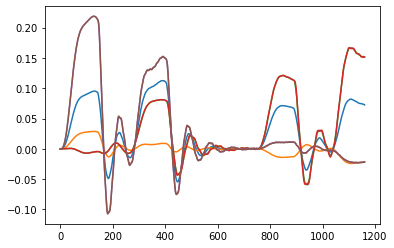

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

for i in range(len(X)):
    plt.plot(X[i])

In [4]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160
0,0.0,3.040333e-06,1.772416e-05,5.396919e-05,1.191539e-04,0.000218,0.000354,0.000530,0.000747,0.001008,...,0.074090,0.073935,0.073769,0.073608,0.073466,0.073346,0.073233,0.073113,0.072882,0.072363
1,0.0,7.505763e-07,4.396411e-06,1.347741e-05,3.001076e-05,0.000056,0.000091,0.000138,0.000196,0.000267,...,-0.022394,-0.022344,-0.022298,-0.022252,-0.022206,-0.022156,-0.022106,-0.022060,-0.021989,-0.021833
2,0.0,2.464332e-08,2.276414e-07,1.045150e-06,3.226209e-06,0.000008,0.000015,0.000025,0.000037,0.000050,...,0.152139,0.152180,0.152038,0.151734,0.151375,0.151091,0.150969,0.150999,0.151065,0.150949
3,0.0,8.646777e-10,1.132477e-08,7.370687e-08,3.202758e-07,0.000001,0.000003,0.000006,0.000013,0.000022,...,0.151152,0.151239,0.151451,0.151740,0.152027,0.152224,0.152269,0.152136,0.151845,0.151438
4,0.0,6.033187e-07,5.523199e-06,2.514590e-05,7.727375e-05,0.000183,0.000364,0.000635,0.001014,0.001518,...,-0.022381,-0.022467,-0.022233,-0.021879,-0.021718,-0.021869,-0.022139,-0.022205,-0.021926,-0.021471
5,0.0,6.703541e-08,8.520370e-07,5.346757e-06,2.225278e-05,0.000070,0.000176,0.000376,0.000703,0.001182,...,-0.021983,-0.021889,-0.022017,-0.022227,-0.022304,-0.022155,-0.021892,-0.021717,-0.021720,-0.021795


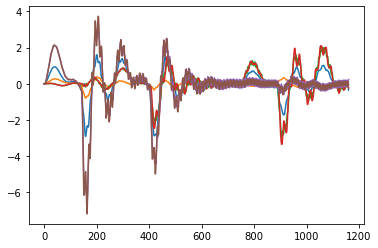

In [5]:
for i in range(len(X)):
    plt.plot(X_t[i])

In [6]:
pd.DataFrame(X_t)

,0,1,2,3,4,5,6,7,8,9,...,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160
0,0.0,3.040333e-03,0.011643,0.024602,0.040583,0.058498,0.077670,0.097838,0.119102,0.141886,...,-0.073488,-0.081504,-0.084200,-0.077146,-0.064451,-0.055801,-0.057013,-0.063496,-0.167431,-0.351492
1,0.0,7.505763e-04,0.002895,0.006186,0.010348,0.015150,0.020439,0.026138,0.032243,0.038817,...,0.025633,0.024300,0.022588,0.022580,0.024213,0.025513,0.024611,0.021561,0.049128,0.106394
2,0.0,2.464332e-05,0.000178,0.000639,0.001542,0.002852,0.004334,0.005645,0.006494,0.006797,...,0.062065,-0.021336,-0.120595,-0.182919,-0.176623,-0.107272,-0.015106,0.045364,0.020934,-0.137475
3,0.0,8.646777e-07,0.000010,0.000053,0.000194,0.000538,0.001214,0.002321,0.003878,0.005784,...,0.008352,0.078495,0.134071,0.155199,0.131280,0.066359,-0.022130,-0.110746,-0.180431,-0.226555
4,0.0,6.033187e-04,0.004317,0.015306,0.036822,0.069260,0.110969,0.160597,0.218403,0.285141,...,-0.129217,0.043944,0.189485,0.165010,-0.003748,-0.148204,-0.121821,0.056371,0.222458,0.232830
5,0.0,6.703541e-05,0.000718,0.003777,0.013129,0.034225,0.071922,0.127853,0.199246,0.280145,...,0.107799,-0.014219,-0.113455,-0.096942,0.019962,0.129029,0.133864,0.041928,-0.044933,-0.030256


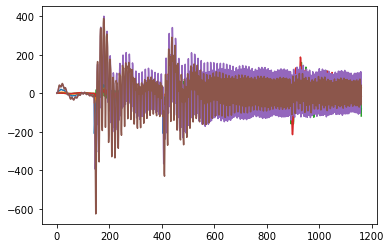

In [7]:
for i in range(len(X)):
    plt.plot(X_tt[i])

In [8]:
pd.DataFrame(X_tt)

,0,1,2,3,4,5,6,7,8,9,...,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160
0,0.0,3.040333,5.562823,7.395236,8.586403,9.328252,9.843525,10.324798,10.939677,11.844325,...,-4.319200,-3.696102,0.999880,6.053833,6.640747,2.009927,-3.222372,-3.259877,-100.675611,-83.385049
1,0.0,0.750576,1.394106,1.896375,2.265500,2.536848,2.751862,2.947371,3.157585,3.416615,...,-0.209036,-1.124257,-0.588025,0.580504,1.052060,0.248367,-1.150202,-1.900094,29.467300,27.799020
2,0.0,0.024643,0.129068,0.331731,0.571021,0.738796,0.743725,0.567312,0.281695,0.020707,...,-30.580765,-52.820169,-46.438874,-15.884977,22.180843,47.169636,44.997316,15.472172,-39.902203,-118.506611
3,0.0,0.000865,0.007866,0.035325,0.105670,0.238818,0.436425,0.670799,0.886816,1.018768,...,35.910023,34.232981,21.342188,-0.213575,-23.705257,-41.215628,-47.274071,-41.341892,-28.342799,-17.781168
4,0.0,0.603319,3.109925,7.879648,13.635937,18.802090,22.906755,26.722099,31.083856,35.654168,...,67.530810,105.630347,39.910416,-64.385181,-104.372670,-40.082982,66.465525,111.726972,54.359098,-43.986782
5,0.0,0.067035,0.583895,2.474892,6.877622,14.218476,23.478549,32.452345,38.940077,41.959329,...,-49.830518,-72.187163,-27.049299,43.562253,73.342512,35.724600,-30.890147,-61.045380,-25.816158,40.493398
